In [3]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt
from scipy import stats
import time
%matplotlib inline
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [2]:
r = requests.get('http://www.baseball-almanac.com/players/ballplayer.shtml')

In [3]:
soup = BeautifulSoup(r.content, 'html.parser')

In [4]:
BeautifulSoup.prettify(soup)

'<html>\n <head>\n  <title>\n   The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac\n  </title>\n  <meta content="Baseball Players Ballplayers Encyclopedia baseball players ballplayers encyclopedia" name="keywords"/>\n  <meta content="The Ballplayers : A Baseball Player Encyclopedia by Baseball Almanac." name="description"/>\n  <meta content="Geisler Young, LLC - http://www.geisleryoung.com/" name="Author"/>\n  <link href="../basitewideV2.css" rel="stylesheet" type="text/css"/>\n </head>\n <body background="../images/ba_bg.jpg" bgcolor="#FFFFFF">\n  <div align="center">\n   <!-- BEGIN GOOGLE ADSENSE -->\n   <script async="" src="//pagead2.googlesyndication.com/pagead/js/adsbygoogle.js">\n   </script>\n   <!-- Responsive -->\n   <ins class="adsbygoogle" data-ad-client="ca-pub-7150597730414049" data-ad-format="auto" data-ad-slot="6668602445" style="display:block">\n   </ins>\n   <script>\n    (adsbygoogle = window.adsbygoogle || []).push({});\n   </script>\n   <!-- END G

In [5]:
td_tags = soup.find_all('td', {'class':'datacolBoxC'})

In [6]:
td_tags_yellow = soup.find_all('td', {'class': 'datacolBoxYellowC'})

In [7]:
td_tags_yellow

[<td class="datacolBoxYellowC" nowrap=""><a href="player-b.shtml"><span style="font-weight:bold; font-size: 14px;">Bab-Bar</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=babbch01" title="Show stats for Charlie Babb">Babb</a><br/>to<br/><a href="player.php?p=barreto01" title="Show stats for Tommy Barrett">Barrett</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b2.shtml"><span style="font-weight:bold; font-size: 14px;">Bar-Bel</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=barrija01" title="Show stats for Jaime Barria">Barria</a><br/>to<br/><a href="player.php?p=belltr01" title="Show stats for Trevor Bell">Bell</a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player-b3.shtml"><span style="font-weight:bold; font-size: 14px;">Bel-Bla</span></a></td>,
 <td class="datacolBoxYellowC" nowrap=""><a href="player.php?p=bellaze01" title="Show stats for Zeke Bella">Bella</a><br/>to<br/><a href="player.ph

In [8]:
link_list = []
for td in td_tags:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE


In [9]:
for td in td_tags_yellow:
    if td.find('a') is None:
        print('NONE')
    else:
        url = td.find('a').get('href')
        if 'shtml' in url:
            link_list.append(url)

NONE
NONE


In [ ]:
link_list = sorted(link_list)

In [ ]:
link_list[0]

In [ ]:
player_list = []
for l in link_list:
    print(l, len(link_list))
    c = requests.get('http://www.baseball-almanac.com/players/' + l).content
    soup = BeautifulSoup(c)
    td_tags = soup.find_all('td', {'class':'datacolBox'})
    for td in td_tags:   
        if 'href' in str(td):
            player_url = td.find('a').get('href')
            player_name = td.find('a').get_text().strip()
            player_list.append({'url':player_url,
                                'name':player_name})

In [ ]:
df_players = pd.DataFrame(player_list)

In [ ]:
df_players

In [ ]:
c = requests.get('http://www.baseball-almanac.com/players/player.php?p=abadfe01').content
soup = BeautifulSoup(c)

tables = soup.find_all('table', {'class':'boxed'})
for t in tables:
    if 'Totals' in str(t):
        print('this one')
        table = t

t_list = table.find_all('td', {'class' : 'datacolC'})
for td in t_list:
    if 'Totals' in str(td):
        pp = td.text.strip(' Totals')

In [ ]:
height_list = []
weight_list = []
name_list = []
url_list = []
firstyear_list = []
lastyear_list = []
pos_list = []
for i, row in df_players.iterrows():    
    print(str(i) + '/' + str(len(df_players)))
    c = requests.get('http://www.baseball-almanac.com/players/' + row['url']).content

    soup = BeautifulSoup(c)

    td_tags = soup.find_all('td', {'class':'biocolpad'})


    for i, td in enumerate(td_tags):
        if 'Height' in str(td):
            reference = i
            height_i = reference + 1

        if 'Weight' in str(td):
            weight_i = i + 1

    height = td_tags[height_i].get_text().strip()
    height_list.append(height)

    weight = td_tags[weight_i].get_text().strip()
    weight_list.append(weight)
    
    url_list.append(row['url'])
    name_list.append(row['name'])
    
    
#     grab first and last year
    tables = soup.find_all('table', {'class':'boxed'})

    r_list = []
    for t in tables:
        r = t.find_all('td', {'class':'datacolBoxC'})
        for td in r:
            r_list.append(td)

    del r_list[-1]

    year_list = []
    for r in r_list:
        if len(r.text) > 3:
            year_list.append(int(r.text))
    firstyear_list.append(year_list[0])
    lastyear_list.append(year_list[-1])
    

#     grab primary position
    for t in tables:
        if 'Totals' in str(t):
            table = t

    t_list = table.find_all('td', {'class' : 'datacolC'})
    for td in t_list:
        if 'Totals' in str(td):
            pp = td.text.strip(' Totals')
    pos_list.append(pp)



    

In [ ]:
    
df_h_w = pd.DataFrame(
    {
        'height':height_list,
        'weight':weight_list,
        'url':url_list,
        'name':name_list,
        'firstyear':firstyear_list,
        'lastyear':lastyear_list,
        'primary_pos': pos_list
             }
)

In [ ]:
df_h_w

In [ ]:
df_h_w.to_csv('player_hw.csv')

In [7]:
df_stats = pd.read_csv('player_hw.csv', index_col = 0)

In [8]:
df_stats['car_length'] = df_stats['lastyear'] - df_stats['firstyear']

In [9]:
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19132 entries, 0 to 19131
Data columns (total 8 columns):
height         19132 non-null object
weight         19132 non-null object
url            19132 non-null object
name           19132 non-null object
firstyear      19132 non-null int64
lastyear       19132 non-null int64
primary_pos    19132 non-null object
car_length     19132 non-null int64
dtypes: int64(3), object(5)
memory usage: 1.3+ MB


In [10]:
df_stats = df_stats[df_stats.weight != 'Unknown']

In [11]:
df_stats.weight = df_stats.weight.astype('int64')

In [12]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.577366,0.585693,0.111505
firstyear,0.577366,1.000000,0.992700,0.013025
lastyear,0.585693,0.992700,1.000000,0.133531
car_length,0.111505,0.013025,0.133531,1.000000


In [13]:
df_stats = df_stats[df_stats['firstyear'] > 1959]

In [14]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,0.352283,0.381560,0.059728
firstyear,0.352283,1.000000,0.958648,-0.253493
lastyear,0.381560,0.958648,1.000000,0.032287
car_length,0.059728,-0.253493,0.032287,1.000000


In [15]:
df_stats = df_stats[df_stats['lastyear'] == 2018]

In [16]:
df_stats.corr()

,weight,firstyear,lastyear,car_length
weight,1.000000,-0.221129,NaN,0.221129
firstyear,-0.221129,1.000000,NaN,-1.000000
lastyear,NaN,NaN,NaN,NaN
car_length,0.221129,-1.000000,NaN,1.000000


In [17]:

def inches(x):
    x = x.replace('½','')
    f_i = re.split('-', x)
    feet = int(f_i[0]) * 12
    inches = int(f_i[1])
    height = feet + inches
    return height

In [18]:
df_stats['height'] = df_stats.height.apply(inches)

In [19]:
df_stats['bmi'] = (df_stats['weight'] / df_stats['height'] / df_stats['height']) * 703

In [20]:
df_stats = df_stats.sort_values('bmi', ascending = False).reset_index(drop = True)

In [21]:
df_stats[df_stats['name'].str.contains('Bartolo')]

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,71,285,player.php?p=colonba01,Bartolo Colon,1997,2018,P,21,39.74509


In [22]:
df_stats.sort_values('car_length', ascending = False)

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,71,285,player.php?p=colonba01,Bartolo Colon,1997,2018,P,21,39.745090
71,71,220,player.php?p=beltrad01,Adrian Beltre,1998,2018,2B,20,30.680421
2,78,300,player.php?p=sabatcc01,CC Sabathia,2001,2018,P,17,34.664694
108,75,240,player.php?p=pujolal01,Albert Pujols,2001,2018,SS,17,29.994667
31,71,230,player.php?p=rodnefe01,Fernando Rodney,2002,2018,P,16,32.074985
97,74,235,player.php?p=martivi01,Victor Martinez,2002,2018,1B,16,30.168919
351,75,225,player.php?p=perezol01,Oliver Perez,2002,2018,P,16,28.120000
859,73,195,player.php?p=utleych01,Chase Utley,2003,2018,3B,15,25.724339
697,72,195,player.php?p=reyesjo01,Jose Reyes,2003,2018,CF,15,26.443866
238,75,230,player.php?p=belisma01,Matt Belisle,2003,2018,P,15,28.744889


In [23]:
df_stats[df_stats.name == 'Scooter Gennett']

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
671,70,185,player.php?p=gennesc01,Scooter Gennett,2017,2018,P,1,26.541837


In [25]:
df_pitchers = df_stats[df_stats['primary_pos'] == 'P']

In [26]:
df_pitchers.corr()

,height,weight,firstyear,lastyear,car_length,bmi
height,1.000000,0.439192,-0.074842,NaN,0.074842,-0.143270
weight,0.439192,1.000000,-0.254555,NaN,0.254555,0.824750
firstyear,-0.074842,-0.254555,1.000000,NaN,-1.000000,-0.237003
lastyear,NaN,NaN,NaN,NaN,NaN,NaN
car_length,0.074842,0.254555,-1.000000,NaN,1.000000,0.237003
bmi,-0.143270,0.824750,-0.237003,NaN,0.237003,1.000000


In [27]:
df_p_obese = df_pitchers[df_pitchers['bmi'] > 30]

In [28]:
df_p_obese.car_length.mean()

5.125

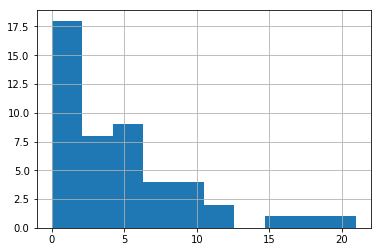

In [29]:
df_p_obese.car_length.hist()

In [30]:
df_p_fit = df_pitchers[df_pitchers['bmi'] <= 30]

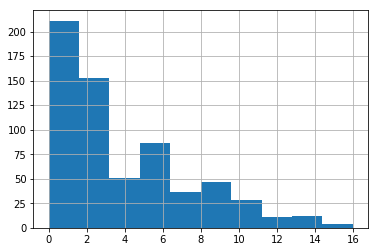

In [31]:
df_p_fit.car_length.hist()

In [32]:
df_p_fit.car_length.mean()

3.8497652582159625

In [33]:
df_pitchers.reset_index(drop = True, inplace = True)

In [34]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,71,285,player.php?p=colonba01,Bartolo Colon,1997,2018,P,21,39.745090
1,71,268,player.php?p=sandopa01,Pablo Sandoval,2018,2018,P,0,37.374330
2,78,300,player.php?p=sabatcc01,CC Sabathia,2001,2018,P,17,34.664694
3,75,275,player.php?p=rondobr01,Bruce Rondon,2013,2018,P,5,34.368889
4,75,272,player.php?p=jimenjo02,Joe Jimenez,2017,2018,P,1,33.993956
5,73,255,player.php?p=petityu01,Yusmeiro Petit,2006,2018,P,12,33.639520
6,72,245,player.php?p=vizcaar01,Arodys Vizcaino,2011,2018,P,7,33.224344
7,77,280,player.php?p=lynnla01,Lance Lynn,2011,2018,P,7,33.199528
8,75,265,player.php?p=goharlu01,Luiz Gohara,2017,2018,P,1,33.119111
9,74,255,player.php?p=montafr01,Frankie Montas,2015,2018,P,3,32.736486


In [35]:
stats.ttest_ind(df_p_fit.car_length, df_p_obese.car_length, equal_var = False)

Ttest_indResult(statistic=-1.888128506459173, pvalue=0.06467362529807888)

In [36]:
df_matcher = pd.read_csv('~/Downloads/people.csv')[['name_first', 'name_last', 'key_fangraphs']]

/home/ethanarsht/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [37]:
df_matcher.columns

Index(['name_first', 'name_last', 'key_fangraphs'], dtype='object')

In [38]:
df_matcher['name'] = (df_matcher['name_first'] + ' ' + df_matcher['name_last'])

In [39]:
df_matcher['name']

0             Evert-Jean 't Hoen
1                            NaN
2                      Al Aaberg
3                   Kirk Aadland
4                     Zach Aaker
5                    Zach Aakhus
6                  Brady Aalbers
7                 Brian Aanderud
8                Gerald Aanonsen
9                            NaN
10                 David Aardsma
11                      Ed Aaron
12                    Ging Aaron
13                    Hank Aaron
14                    Lary Aaron
15                  Melvin Aaron
16                  Robert Aaron
17                     Tom Aaron
18                  Tommie Aaron
19                   W. M. Aaron
20                  Wilmer Aaron
21                   Eric Aarons
22                Glenn Aaronson
23                      Don Aase
24                   Kermit Aase
25                    Cody Aasen
26                     Andy Abad
27                Che Yeyne Abad
28                 Fernando Abad
29                    Henry Abad
30        

In [40]:
df_matched = pd.merge(df_matcher, df_pitchers, how = 'outer', on = 'name').dropna(subset = ['height'])

In [41]:
df_pitchers

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,71,285,player.php?p=colonba01,Bartolo Colon,1997,2018,P,21,39.745090
1,71,268,player.php?p=sandopa01,Pablo Sandoval,2018,2018,P,0,37.374330
2,78,300,player.php?p=sabatcc01,CC Sabathia,2001,2018,P,17,34.664694
3,75,275,player.php?p=rondobr01,Bruce Rondon,2013,2018,P,5,34.368889
4,75,272,player.php?p=jimenjo02,Joe Jimenez,2017,2018,P,1,33.993956
5,73,255,player.php?p=petityu01,Yusmeiro Petit,2006,2018,P,12,33.639520
6,72,245,player.php?p=vizcaar01,Arodys Vizcaino,2011,2018,P,7,33.224344
7,77,280,player.php?p=lynnla01,Lance Lynn,2011,2018,P,7,33.199528
8,75,265,player.php?p=goharlu01,Luiz Gohara,2017,2018,P,1,33.119111
9,74,255,player.php?p=montafr01,Frankie Montas,2015,2018,P,3,32.736486


In [42]:
df_matched.dropna(subset = ['height', 'name_first', 'key_fangraphs'], inplace = True)

In [43]:
df_matched.reset_index(drop = True, inplace = True)

In [44]:
df_matched[df_matched.name_last == 'Pichardo']

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi


In [45]:
df_matched[df_matched.name_last == 'Colon']

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi
129,Bartolo,Colon,375.0,Bartolo Colon,71.0,285.0,player.php?p=colonba01,1997.0,2018.0,P,21.0,39.74509


In [46]:
df_duped= df_matched[df_matched['name'].duplicated(keep = False)]

In [47]:
df_duped.drop_duplicates(subset = ['name', 'firstyear', 'lastyear'])

,name_first,name_last,key_fangraphs,name,height,weight,url,firstyear,lastyear,primary_pos,car_length,bmi
1,Austin,Adams,13801.0,Austin Adams,74.0,225.0,player.php?p=adamsau02,2017.0,2018.0,P,1.0,28.885135
11,Jose,Alvarez,5358.0,Jose Alvarez,71.0,190.0,player.php?p=alvarjo02,2013.0,2018.0,P,5.0,26.496727
15,Drew,Anderson,5578.0,Drew Anderson,75.0,185.0,player.php?p=anderdr02,2017.0,2018.0,P,1.0,23.120889
102,Jose,Castillo,17169.0,Jose Castillo,77.0,246.0,player.php?p=castijo03,2018.0,2018.0,P,0.0,29.168157
104,Luis,Castillo,513.0,Luis Castillo,74.0,190.0,player.php?p=castilu02,2017.0,2018.0,P,1.0,24.391892
156,Edwin,Diaz,14710.0,Edwin Diaz,75.0,165.0,player.php?p=diazed04,2016.0,2018.0,P,2.0,20.621333
183,Josh,Fields,7490.0,Josh Fields,72.0,195.0,player.php?p=fieldjo03,2013.0,2018.0,P,5.0,26.443866
211,Luis,Garcia,140.0,Luis Garcia,74.0,230.0,player.php?p=garcilu03,2013.0,2018.0,P,5.0,29.527027
237,Miguel,Gonzalez,4049.0,Miguel Gonzalez,73.0,180.0,player.php?p=gonzami03,2012.0,2018.0,P,6.0,23.745543
255,Javy,Guerra,17292.0,Javy Guerra,73.0,225.0,player.php?p=guerrja01,2011.0,2018.0,P,7.0,29.681929


In [48]:
f = requests.get('https://www.fangraphs.com/statss.aspx?playerid=13801.0')
    
f_soup = BeautifulSoup(f.content.decode('utf-8'), 'html.parser')

tables = f_soup.find_all('table', {'class': 'rgMasterTable', 'id': 'SeasonStats1_dgSeason11_ctl00'})

war_table = tables[0]

trs = war_table.find_all('tr')

for tr in trs:

    if tr:
        tds = tr.find_all('td')

In [49]:
tds

[<td class="grid_line_regular"><a href="http://www.fangraphs.com/leaders.aspx?pos=all&amp;stats=pit&amp;lg=all&amp;qual=y&amp;type=8&amp;season=2018&amp;month=0&amp;season1=2017&amp;ind=0&amp;team=0&amp;rost=0&amp;players=0">Total</a></td>,
 <td class="grid_line_regular">- - -</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">8</td>,
 <td align="right" class="grid_line_regular">0</td>,
 <td align="right" class="grid_line_regular">6.0</td>,
 <td align="right" class="grid_line_break">15.00</td>,
 <td align="right" class="grid_line_regular">16.50</td>,
 <td align="right" class="grid_line_regular">0.00</td>,
 <td align="right" class="grid_line_regular">.357</td>,
 <td align="right" class="grid_line_regular">76.5 %</td>,
 <td align="right" class="grid_line_regular">42.9 %</td>,
 <td align="right" class="grid_line_regular">0.0 %</td>,

In [50]:

def war_scraper(name, player_id):
    global df_player
    
    f = requests.get('https://www.fangraphs.com/statss.aspx?playerid={}'.format(player_id))
    
    f_soup = BeautifulSoup(f.content.decode('utf-8'), 'html.parser')

    tables = f_soup.find_all('table', {'class': 'rgMasterTable', 'id': 'SeasonStats1_dgSeason11_ctl00'})

    war_table = tables[0]

    trs = war_table.find_all('tr')

    for tr in trs:

        if tr:
            tds = tr.find_all('td')
            if tds:
                if tds[-1].text != '\xa0': 
                    df_list.append(
                    {
                        'year': tds[0].text,
                        'war': tds[-1].text,
                        'team': tds[1].text,
                        'name': name,
                        'games': tds[5].text,
                        'gs': tds[6].text
                    })
    df_player = pd.DataFrame(df_list)
    
    df_player = df_player[~df_player['team'].str.contains('Depth Charts|Steamer|Fans|Zips|ZiPS|- - -')]
    
    df_player = df_player.drop_duplicates(subset = ['name','year'], keep = 'first').reset_index(drop = True)
    
    df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')

In [52]:
df_list = []
for name, key, n in zip(df_matched.name, df_matched.key_fangraphs, range(0, len(df_matched))):
    print(name)
    print(str(n) + '/' + str(len(df_matched)))
    war_scraper(name, key)

Jason Adam
0/693
Austin Adams
1/693
Austin Adams
2/693
Matt Albers
3/693
Sandy Alcantara
4/693
Victor Alcantara
5/693
Scott Alexander
6/693
Cody Allen
7/693
Miguel Almonte
8/693
Yency Almonte
9/693
Dan Altavilla
10/693
Jose Alvarez
11/693
Jose Alvarez
12/693
Brett Anderson
13/693
Chase Anderson
14/693
Drew Anderson
15/693
Drew Anderson
16/693
Justin Anderson
17/693
Tanner Anderson
18/693
Tyler Anderson
19/693
Matt Andriese
20/693
Victor Arano
21/693
Pedro Araujo
22/693
Chris Archer
23/693
Jake Arrieta
24/693
Alec Asher
25/693
Luis Avilan
26/693
John Axford
27/693
Pedro Baez
28/693
Sandy Baez
29/693
Homer Bailey
30/693
Anthony Banda
31/693
Johnny Barbato
32/693
Luke Bard
33/693
Scott Barlow
34/693
Danny Barnes
35/693
Jacob Barnes
36/693
Matt Barnes
37/693
Tony Barnette
38/693
Kyle Barraclough
39/693
Jake Barrett
40/693
Jaime Barria
41/693
Tyler Bashlor
42/693
Anthony Bass
43/693
Chris Bassitt
44/693
Trevor Bauer
45/693
Buddy Baumann
46/693
Gerson Bautista
47/693
Chris Beck
48/693
Cam Be

Carlos Martinez
391/693
Carlos Martinez
392/693
Carlos Martinez
393/693
Phil Maton
394/693
Steven Matz
395/693
Brandon Maurer
396/693
Mike Mayers
397/693
Tim Mayza
398/693
Cory Mazzoni
399/693
Zach McAllister
400/693
Brandon McCarthy
401/693
Kevin McCarthy
402/693
Jake McGee
403/693
Kyle McGrath
404/693
Deck McGuire
405/693
Collin McHugh
406/693
Kris Medlen
407/693
Ryan Meisinger
408/693
Adalberto Mejia
409/693
Mark Melancon
410/693
Yohander Mendez
411/693
Daniel Mengden
412/693
Ben Meyer
413/693
Keynan Middleton
414/693
Miles Mikolas
415/693
Wade Miley
416/693
Andrew Miller
417/693
Justin Miller
418/693
Justin Miller
419/693
Hoby Milner
420/693
Juan Minaya
421/693
Mike Minor
422/693
Ariel Miranda
423/693
Frankie Montas
424/693
Jordan Montgomery
425/693
Mike Montgomery
426/693
Matt Moore
427/693
Adam Morgan
428/693
Mike Morin
429/693
Reyes Moronta
430/693
Akeel Morris
431/693
Brandon Morrow
432/693
Charlie Morton
433/693
Charlie Morton
434/693
Taylor Motter
435/693
Gabriel Moya
436/693

In [55]:
df_player_saved = pd.DataFrame()
df_player_saved = pd.concat([df_player_saved, df_player])

In [56]:
df_player

,games,gs,name,team,war,year
0,31,0,Jason Adam,Royals,-0.4,2018
1,6,0,Austin Adams,Nationals,0.0,2017
2,2,0,Austin Adams,Nationals,-0.2,2018
3,6,0,Austin Adams,Indians,0.0,2014
4,28,0,Austin Adams,Indians,0.1,2015
5,19,0,Austin Adams,Indians,-0.2,2016
6,4,2,Matt Albers,Astros,0.3,2006
7,31,18,Matt Albers,Astros,0.0,2007
8,28,3,Matt Albers,Orioles,0.2,2008
9,56,0,Matt Albers,Orioles,0.7,2009


In [1]:
df_player[df_player.name == 'Chris Davis']

NameError: name 'df_player' is not defined

In [57]:
df_player_saved.to_csv('active_pitcher_war.csv')

In [59]:
df_player_saved.to_csv('~/Downloads/active_pitcher_war.csv')

In [ ]:
df_player.war = pd.to_numeric(df_player.war, errors = 'coerce')

In [4]:
df_pwar = pd.read_csv('active_pitcher_war.csv', index_col = 0)

In [6]:
df_pwar[df_pwar.name == 'Scooter Gennett']

,games,gs,name,team,war,year
1110,29,21,Scooter Gennett,Brewers,2.0,2013
1111,55,54,Scooter Gennett,Brewers,1.7,2014
1112,42,29,Scooter Gennett,Brewers,0.2,2015
1113,58,56,Scooter Gennett,Brewers,0.2,2016
1114,80,97,Scooter Gennett,Reds,2.3,2017
1115,74,75,Scooter Gennett,Reds,3.8,2018


In [52]:
df_pwar

,games,gs,name,team,war,year
0,31,0,Jason Adam,Royals,-0.4,2018
1,6,0,Austin Adams,Nationals,0.0,2017
2,2,0,Austin Adams,Nationals,-0.2,2018
3,6,0,Austin Adams,Indians,0.0,2014
4,28,0,Austin Adams,Indians,0.1,2015
5,19,0,Austin Adams,Indians,-0.2,2016
6,4,2,Matt Albers,Astros,0.3,2006
7,31,18,Matt Albers,Astros,0.0,2007
8,28,3,Matt Albers,Orioles,0.2,2008
9,56,0,Matt Albers,Orioles,0.7,2009


In [53]:
def drop_duplicate_players(player):
    global df_pwar
    
    print(player)

    df_player = df_pwar[df_pwar['name'] == player]

    df_player['year'] = df_player['year'].astype(int)

    df_player_years = df_matched[df_matched.name == player].iloc[0]

    years = range(int(df_player_years['firstyear']), int(df_player_years['lastyear'] + 1))



    drop_mask = df_player[~df_player.year.isin(years)]
    if drop_mask.empty == False:
        df_pwar = df_pwar.drop(drop_mask.index)



In [54]:
df_pwar

,games,gs,name,team,war,year
0,31,0,Jason Adam,Royals,-0.4,2018
1,6,0,Austin Adams,Nationals,0.0,2017
2,2,0,Austin Adams,Nationals,-0.2,2018
3,6,0,Austin Adams,Indians,0.0,2014
4,28,0,Austin Adams,Indians,0.1,2015
5,19,0,Austin Adams,Indians,-0.2,2016
6,4,2,Matt Albers,Astros,0.3,2006
7,31,18,Matt Albers,Astros,0.0,2007
8,28,3,Matt Albers,Orioles,0.2,2008
9,56,0,Matt Albers,Orioles,0.7,2009


In [55]:
for n in df_pwar.name.unique():
    drop_duplicate_players(n)

Jason Adam
Austin Adams


/home/ethanarsht/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Matt Albers
Sandy Alcantara
Victor Alcantara
Scott Alexander
Cody Allen
Miguel Almonte
Yency Almonte
Dan Altavilla
Jose Alvarez
Brett Anderson
Chase Anderson
Drew Anderson
Justin Anderson
Tanner Anderson
Tyler Anderson
Matt Andriese
Victor Arano
Pedro Araujo
Chris Archer
Jake Arrieta
Alec Asher
Luis Avilan
John Axford
Pedro Baez
Sandy Baez
Homer Bailey
Anthony Banda
Johnny Barbato
Luke Bard
Scott Barlow
Danny Barnes
Jacob Barnes
Matt Barnes
Tony Barnette
Kyle Barraclough
Jake Barrett
Jaime Barria
Tyler Bashlor
Anthony Bass
Chris Bassitt
Trevor Bauer
Buddy Baumann
Gerson Bautista
Chris Beck
Cam Bedrosian
Tyler Beede
Jalen Beeks
Matt Belisle
Jeff Beliveau
Chad Bell
Christian Bergman
Jose Berrios
Dellin Betances
Chad Bettis
Joe Biagini
Austin Bibens-Dirkx
Jesse Biddle
Shane Bieber
Ty Blach
Ray Black
Paul Blackburn
Alex Blandino
Jeremy Bleich
Richard Bleier
Jerry Blevins
Ryan Borucki
Brad Boxberger
Matt Boyd
Blaine Boyer
Brad Brach
Silvino Bracho
Archie Bradley
Ryan Brasier
Steven Brault
J

Jose Urena
Jose Valdez
Jesmuel Valentin
Jason Vargas
Jerry Vasto
Felipe Vazquez
Hector Velazquez
Pat Venditte
Jonny Venters
Drew VerHagen
Justin Verlander
Nick Vincent
Arodys Vizcaino
Chris Volstad
Austin Voth
Michael Wacha
Adam Wainwright
Marcus Walden
Taijuan Walker
Adam Warren
Tony Watson
Luke Weaver
Tyler Webb
Ryan Weber
Zack Weiss
Tyler White
Chase Whitley
Aaron Wilkerson
Taylor Williams
Trevor Williams
Alex Wilson
Justin Wilson
Dan Winkler
Matt Wisler
Nick Wittgren
Alex Wood
Blake Wood
Hunter Wood
Brandon Woodruff
Brandon Workman
Mike Wright
Steven Wright
Jimmy Yacabonis
Ryan Yarbrough
Kirby Yates
Mike Zagurski
Rob Zastryzny
Brad Ziegler
Jordan Zimmermann


In [56]:
df_pwar.year = df_pwar.year.astype(int)

In [57]:
df_pwar[df_pwar.year < 1960]

,games,gs,name,team,war,year


In [58]:
df_combined = pd.merge(df_pwar, df_pitchers, on = 'name', how = 'outer').drop(['firstyear', 'lastyear', 'primary_pos', 'car_length', 'url'], axis = 1)

In [59]:
df_pitchers[df_pitchers.name == 'Bartolo Colon']

,height,weight,url,name,firstyear,lastyear,primary_pos,car_length,bmi
0,71,285,player.php?p=colonba01,Bartolo Colon,1997,2018,P,21,39.74509


In [60]:
df_combined['yoc'] = np.NaN

In [61]:
df_combined[df_combined.name == 'Bob Malloy']

,games,gs,name,team,war,year,height,weight,bmi,yoc


In [62]:
df_combined.drop_duplicates(subset = ['name', 'yoc', 'year', 'war', 'team'], keep = False, inplace = True)

In [63]:
df_combined = df_combined[~df_combined.name.str.contains('Dave Roberts|Henry Rodriguez')]

In [64]:
df_yoc = df_combined

In [66]:
df_yoc

,games,gs,name,team,war,year,height,weight,bmi,yoc
0,31.0,0,Jason Adam,Royals,-0.4,2018.0,76,225,27.384868,NaN
1,6.0,0,Austin Adams,Nationals,0.0,2017.0,74,225,28.885135,NaN
2,2.0,0,Austin Adams,Nationals,-0.2,2018.0,74,225,28.885135,NaN
3,4.0,2,Matt Albers,Astros,0.3,2006.0,73,225,29.681929,NaN
4,31.0,18,Matt Albers,Astros,0.0,2007.0,73,225,29.681929,NaN
5,28.0,3,Matt Albers,Orioles,0.2,2008.0,73,225,29.681929,NaN
6,56.0,0,Matt Albers,Orioles,0.7,2009.0,73,225,29.681929,NaN
7,62.0,0,Matt Albers,Orioles,0.1,2010.0,73,225,29.681929,NaN
8,56.0,0,Matt Albers,Red Sox,0.0,2011.0,73,225,29.681929,NaN
9,63.0,0,Matt Albers,2 Teams,-0.4,2012.0,73,225,29.681929,NaN


In [68]:
df_p

,games,gs,name,team,war,year,height,weight,bmi,yoc
index,,,,,,,,,,
0,31.0,0,Jason Adam,Royals,-0.4,2018.0,76,225,27.384868,0


In [69]:
for p in df_yoc.name.unique():
    df_p = df_combined[df_combined.name == p]
    
    df_p = df_p.reset_index()
    df_p['yoc'] = df_p.index
    df_p = df_p.set_index('index')
    for i, row in df_p.iterrows():
        
        df_yoc.loc[i, ['yoc']] = (row['year'] - df_p.iloc[0, 5]) + 1
          

In [70]:
df_yoc

,games,gs,name,team,war,year,height,weight,bmi,yoc
0,31.0,0,Jason Adam,Royals,-0.4,2018.0,76,225,27.384868,1.0
1,6.0,0,Austin Adams,Nationals,0.0,2017.0,74,225,28.885135,1.0
2,2.0,0,Austin Adams,Nationals,-0.2,2018.0,74,225,28.885135,2.0
3,4.0,2,Matt Albers,Astros,0.3,2006.0,73,225,29.681929,1.0
4,31.0,18,Matt Albers,Astros,0.0,2007.0,73,225,29.681929,2.0
5,28.0,3,Matt Albers,Orioles,0.2,2008.0,73,225,29.681929,3.0
6,56.0,0,Matt Albers,Orioles,0.7,2009.0,73,225,29.681929,4.0
7,62.0,0,Matt Albers,Orioles,0.1,2010.0,73,225,29.681929,5.0
8,56.0,0,Matt Albers,Red Sox,0.0,2011.0,73,225,29.681929,6.0
9,63.0,0,Matt Albers,2 Teams,-0.4,2012.0,73,225,29.681929,7.0


In [71]:
df_yoc[df_yoc.yoc < 0]

,games,gs,name,team,war,year,height,weight,bmi,yoc


In [72]:
df_yoc.dropna(subset = ['yoc'], inplace = True)

In [73]:
df_yoc.to_csv('active_pitcher_data.csv')

In [ ]:
df_co = df_combined[df_combined.bmi >= 25]

In [ ]:
len(df_co)

In [ ]:
df_sv = df_combined[df_combined.bmi < 25]

In [ ]:
len(df_sv)

In [ ]:
df_sv.head()

In [ ]:
sv_year_counts = pd.DataFrame(df_sv.yoc.value_counts())

In [ ]:
co_year_counts = pd.DataFrame(df_co.yoc.value_counts())

In [ ]:
co_year_counts

In [ ]:
co_war = []
sv_war = []

In [ ]:
import math
def war_means(df, war_list):
    for i in df.yoc.unique():
        print(i)
        df_y = df[df.yoc == i]
        y_mean = df_y.war.mean()
        if math.isnan(y_mean):
            print(df_y, i)
        war_list.append(y_mean)
    return war_list

In [ ]:
co_war = war_means(df_co, co_war)

In [ ]:
war_list = war_means(df_sv, sv_war)

In [ ]:
sv_war

In [ ]:
co_year_counts['war'] = co_war
sv_year_counts['war'] = sv_war


In [ ]:
sv_year_counts.drop(0, inplace = True)

In [ ]:
co_year_counts.drop(0, inplace = True)

In [ ]:
co_year_counts

In [ ]:
sv_year_counts['ar'] = sv_year_counts['yoc'].pct_change()

In [ ]:
co_year_counts['ar'] = co_year_counts['yoc'].pct_change()

In [ ]:
co_year_counts

In [ ]:
df_sv_plot = sv_year_counts.loc[:15]
df_co_plot = co_year_counts.loc[:15]

In [ ]:
df_sv_plot['ar'] = df_sv_plot['ar'] * -1
df_co_plot['ar'] = df_co_plot['ar'] * -1

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.plot(df_sv_plot['ar'], linewidth = 5, label = 'Regular Weight (n = {})'.format(len(df_sv.name.unique())))
plt.plot(df_co_plot['ar'], linewidth = 5, label = 'Overweight (n = {})'.format(len(df_co.name.unique())))
plt.ylabel('Dropoff Rate', fontsize = 12)
plt.xlabel('Year of Career', fontsize = 12)
plt.title('Pitcher Attrition Rate by Year', fontsize = 16)
plt.legend(fontsize = 12)
plt.savefig('/home/ethanarsht/Downloads/pitchattrition.png')


In [ ]:
plt.plot(df_sv_plot['war'], label = 'svelt')
plt.plot(df_co_plot['war'], label = 'heavy')
plt.legend()